In [41]:
import pandas as pd
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
import random 

In [42]:
# read input file
filepath = "space_mountain_with_holiday_weather_lag_suite.csv"
df = pd.read_csv(filepath)

In [43]:
# one hot encode the Day of Week column
# drop_first=True is used to avoid multicollinearity (dummy variable trap)
df = pd.get_dummies(df, columns=['Day of Week']) 

In [44]:
# ------ SPLITTING DATASET ------
# train on 2014 (December), 2015, 2016, 2017, 2018, 2019, 2022 (excluding COVID years)
# test on 2023, 2024, 2025 (January - March)
train_years = ['14', '15', '16', '17', '18', '19', '22']
test_years = ['23', '24', '25']

df['Year'] = df['Date'].apply(lambda x: x.split('/')[-1])  # Extract year as a string
df = df[df['Time of Day'] >= 450]
df['Time_sq'] = df['Time of Day'] ** 2
df['Time_sin'] = np.sin(2 * np.pi * df['Time of Day'] / 1440)
df['Time_cos'] = np.cos(2 * np.pi * df['Time of Day'] / 1440)

train_df = df[df['Year'].isin(train_years)]  # Filter rows where Year is in train_years
test_df = df[df['Year'].isin(test_years)]  # Filter rows where Year is in train_years

train_df.shape, test_df.shape

((30844, 24), (12198, 24))

In [45]:
# getting datasets
y_train = train_df['Wait Time'].values
X_train = train_df.drop(columns=['Wait Time', 'Date', 'Time', 'Year'])
y_test = test_df['Wait Time'].values
X_test = test_df.drop(columns=['Wait Time', 'Date', 'Time', 'Year'])

print("X_train:")
print(X_train.head())

print("\ny_train (first 10):")
print(y_train[:10])

print("\nX_test:")
print(X_test.head())

print("\ny_test (first 10):")
print(y_test[:10])

X_train:
   Month  Time of Day  Is_Holiday  Is_Holiday_Adjacency  Temperature  \
0     12          570       False                 False         11.9   
1     12          600       False                 False         16.1   
2     12          630       False                 False         16.1   
3     12          660       False                 False         18.8   
4     12          690       False                 False         18.8   

   Precipitation  Lag1_Wait_Time  Lag2_Wait_Time  Lag3_Wait_Time  \
0            0.0            12.0            13.0            10.0   
1            0.0             6.0            23.0            29.0   
2            0.0             9.0            23.0             7.0   
3            0.0            12.0            40.0             7.0   
4            0.0            19.0            49.0            43.0   

   RollingMean_Lag3  Day of Week_Friday  Day of Week_Monday  \
0         11.666667               False               False   
1         19.333333    

In [46]:
# create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([ 2.96797869, 28.96194344, 28.65153582, ..., 59.67432622,
       57.62140288, 50.46661597], shape=(12198,))

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: {}".format(rmse))

RMSE: 16.69792536546807


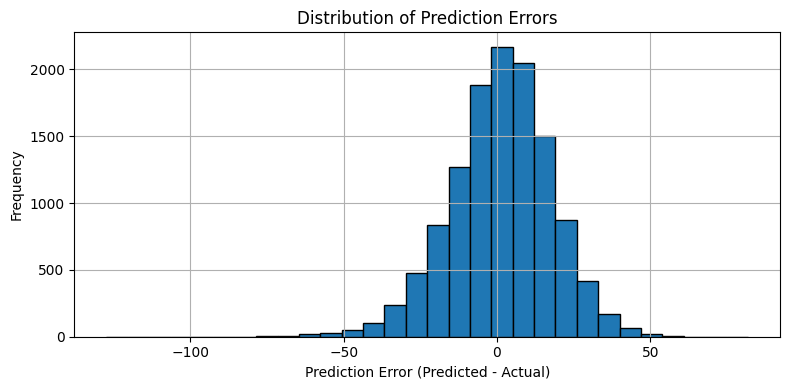

In [48]:
errors = np.array(y_pred) - np.array(y_test)

plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

